# Project 7: Statistical Analysis and Hypothesis Testing

##Project : Increasing YoY revenue from game purchases by increasing retention rate of gamers
##About the project:
 The project involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player's enjoyment of the game being increased and prolonged. But where should the gates be placed and how the placement of the gates can retain the players for more time.

The project requires you to:

 * Perform exploratory data analysis of the given datasets and generate their statistical summary.
 * Perform A/B testing between the two groups of data to analyze the impact on player retention if the first gate in Cookie Cats is moved from level 30 to level 40.

##Aim:

   Even though the overall subscription for the game is growing, the revenue from in-game purchases has been declining and many players are uninstalling the game after playing for a few days. What recommendations can you suggest increasing the in-game purchase and retaining the players?

##Objectives/Exercise:
The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.

In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players i.e.,
 * group A would encounter the gate at level 30, and
 * group B would encounter the gate at level 40

To achieve the overall objectives, this work plan can help:

1)Perform initial data preparation.

2)Generate statistical summary and plot charts to answer:
   * What is the overall 7-day retention rate of the game?
   * How many players never played the game after installing it?
   * Does the number of players decrease as the levels become difficult?

3)Generate crosstab for two player groups to understand the difference in the 1-day and 7-days retention rate and total number of game rounds played.

4)Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played. Here, you can:

 Check the assumptions of two sample test:
              (Normal distribution – Apply Shapiro test) (Homogeneity of variance – Apply Levene’s test)

   Apply the relevant two sample significance test method based on the results from the tests for normality and homogeneity

5)Analyze the significance of the test results and decide which level has more advantage in terms of player retention?

6)Use bootstrap resampling to plot retention rate distribution for both groups to visualize the effect of different versions of the game on retention.







## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


In [ ]:
#Read data using pandas
user_df=pd.read_csv("cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [ ]:
#Check for any missing values in the data using isnull() function

user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [ ]:
#To checck if there is any duplicate user_id
user_df.userid.nunique() / user_df.shape[0]

1.0

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

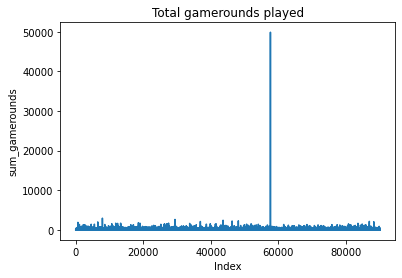

In [ ]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

The above plot shows that there is an outlier.Using max() function, we figure out the outlier value for sum_gamerounds as 49,854.

In [ ]:
user_df.sum_gamerounds.max()

49854

In [ ]:
from operator import index
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
print("max value of sum_gamerounds")
max_value = max(user_df.sum_gamerounds)
max_value

print("index of the max value")
index_value = user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()
index_value

#remove the row by index
user_df.drop(user_df.index[index_value],inplace=True)


max value of sum_gamerounds


49854

index of the max value


[57702]

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

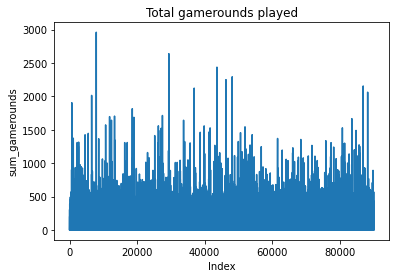

In [ ]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)


## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [ ]:
#Insert calculation for 7-day retention rate

retention_rate_7=round(user_df.retention_7.sum()/user_df.shape[0]*100,2)

print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [ ]:
# Find number of customers with sum_gamerounds is equal to zero
user_df[user_df.sum_gamerounds == 0].shape[0]


3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'count of players Vs sum_gamerounds ')

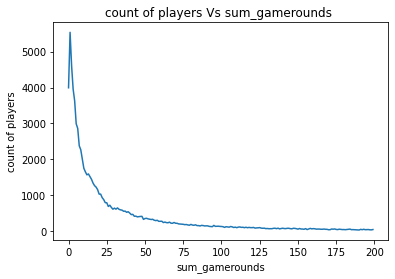

In [ ]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
new_data = user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:200]
plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")
plt.title("count of players Vs sum_gamerounds ")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

Observation:
  
* The observation from the above plot is, the number of users decreased as the game level increases, which means that the high level game-rounds are difficult.

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [ ]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    

Based on the cross tab it looks there is neglible difference among the two groups, but we need to validate it statistically. It  also shows that majority(~80%) in both the cases stopped playing the game after 7 day period. While we see around 50% customer donot play the game in the first day after installing the game.

### Q3.2 Gamerounds summary for different game versions

In [ ]:
#use pandas group by to calculate average game rounds played summarized by different versions

user_df[["version","sum_gamerounds"]].groupby("version").agg("mean")


,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    


I appears that there is not much difference in the total by each player differ based on different versions of the game

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

 Two-sample t-test
 
 * The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal.
  * A two-sample t-test is used to analyze the results from A/B tests. 
  * It can be used to test when the data values are independent, are randomly sampled from two normal populations and the two independent groups have equal variances

### Initial data processing

In [ ]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

In [ ]:
user_df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


### Q4.1 Shapiro test of Normality

Shapiro Wilks Normality Test:

  * The Shapiro-Wilks test for normality is one of three general normality tests designed to detect all departures from normality.
  * It is comparable in power to the other two tests. The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.

In [ ]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A

normality_A = shapiro(group_A)
#test for group_B
normality_B = shapiro(group_B)

In [ ]:
print(normality_A)
print(normality_B)

(0.48864424228668213, 0.0)
(0.48256540298461914, 0.0)


<mark>__Analsysis Results:__
    


we see the p-value is 0.0 which show that the alternate hypothesis is true i.e. the distribution are not normal


### Q4.2 Test of homegienity of variance

Homogeneity of Variance:
 
  * Equal  variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The Levene test can be used to verify that assumption.

  * if the resulting p-value of Levene's test is less than some significance level(typically 0.05),the obtained differences in sample variances are unlikely to have occured based on random sampling from a population with equal variances.

In [ ]:
from scipy.stats import levene
import scipy.stats as stats

In [ ]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

levene(group_A.sum_gamerounds, group_B.sum_gamerounds)



LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    


the p-value suggests that we fail to reject the null hypothesis that,the two group have equal variance.

### Q4.3 Test of significance: Two sample test

 * A test of significance is a formal procedure for comparing observed data with a claim (also called a hypothesis), the truth of which is being assessed. The claim is a statement about a parameter, like the population proportion p or the population mean p.
 * The Mann Whitney U test, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test, is used to test whether two samples are likely to derive from the same population (i.e., that the two populations have the same shape).
 * When computing U, the number of comparisons equals the product of the number of values in group A times the number of values in group B. If the null hypothesis is true, then the value of U should be about half that value. If the value of U is much smaller than that, the P value will be small.
	
	
	


In [ ]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [ ]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds,alternative="greater")

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    


we have used mann-whitney u test to check the null hypothesis, whether the two groups are similar or different. We have repeated the mann-whitney u test with the same hypothesis but with the alternate hypothesis being whether the first group is greater than the second group. The results make it clear that the group_A and group_B are statistically different.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [ ]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

user_df[["version","retention_7","retention_1"]].groupby("version").agg("mean")


,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    


Based on the significance test we can conclude that gate level 30 has higher retention rate.The company should not change the gate from level 30 to level 40.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

 * The bootstrap method is resampling technique used estimate statistics on a population by sampling a dataset with replacement. It can be used to estimate summary statistics such as the mean or standard deviation. 
 * This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics.

Text(0.5, 0, 'Retention Rate')

Text(0.5, 1.0, '1-Day Retention Rate Distribution')

Text(0.5, 0, 'Retention Rate')

Text(0.5, 1.0, '7-Days Retention Rate Distribution')

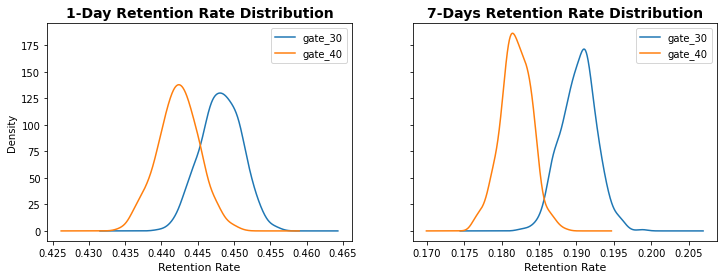

In [ ]:
#Hint: Plot density function

list_1day = []
list_7day = []
for i in range(500):
   boot_mean1 = user_df.sample(frac = 0.7,replace = True).groupby('version')['retention_1'].mean()
   list_1day.append(boot_mean1.values)

   boot_mean2 = user_df.sample(frac = 0.7,replace = True).groupby('version')['retention_7'].mean()
   list_7day.append(boot_mean2.values)

#Transforming the list to a DataFrame
list_1day = pd.DataFrame(list_1day, columns = ['gate_30','gate_40'])
list_7day = pd.DataFrame(list_7day, columns = ['gate_30','gate_40'])

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,4))

list_1day.plot(kind = "kde", ax =  ax1)
ax1.set_xlabel("Retention Rate", size=11)
ax1.set_title("1-Day Retention Rate Distribution", fontweight='bold', size=14)

list_7day.plot(kind = "kde", ax =  ax2)
ax2.set_xlabel("Retention Rate", size=11)
ax2.set_title("7-Days Retention Rate Distribution", fontweight='bold', size=14)

Observation:

  * The above plots show the same results as that of the previous cross tab. That is, gate_30 is having higher retention Rate for both 1-day & 7-days.

Text(0.5, 0, '%Difference')

Text(0, 0.5, '%Density')

Text(0.5, 1.0, 'Difference in Rentention Rates at both gates 30 & 40.')

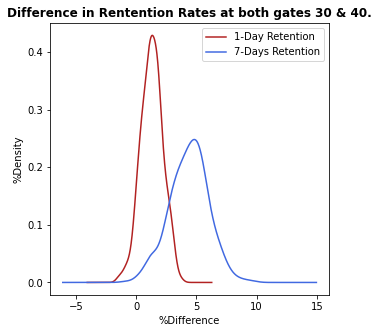

In [ ]:
#Adding a column with the % difference between the two (A & B) groups for both gate_30 & gate_40.
list_1day['diff'] = (list_1day['gate_30'] - list_1day['gate_40']) / list_1day['gate_30']*100
list_7day['diff'] = (list_7day['gate_30'] - list_7day['gate_40']) / list_7day['gate_30']*100

#Plotting the Bootstrap % Difference for gate_30
fig,(ax1) = plt.subplots(1,1, figsize=(5,5))
list_1day['diff'].plot(kind="kde",ax=ax1,c="#b22222",label="1-Day Retention" )
list_7day['diff'].plot(kind="kde",ax=ax1,c="#4169e1",label="7-Days Retention" )
ax1.set_xlabel("%Difference")
ax1.set_ylabel("%Density")
ax1.set_title("Difference in Rentention Rates at both gates 30 & 40.", fontweight='bold')
plt.legend()
plt.show()

observation:
  
  * The above chart shows that the mostly likely % difference is around 1% to 3% for 1-Day Retention, and is higher(around 2% to 8%) for 7-Days Retention.

* Mostly the distribution is above 0% at gate_30.


Finding the probability of 1-day & 7-days Retention Rates at Gate_30.

In [ ]:
#calculating Probabilities for 1-day & 7-days Retention Rate at gate_30
prob1=(list_1day['diff'] >0).sum() / len(list_1day)
prob2=(list_7day['diff'] >0).sum() / len(list_7day)

#printing the probability

print("Probability of 1-day Retention Rate at gate_30:",'{:.1%}'.format(prob1))
print("Probability of 7-days Retention Rate at gate_30:",'{:.1%}'.format(prob2))


Probability of 1-day Retention Rate at gate_30: 92.6%
Probability of 7-days Retention Rate at gate_30: 99.8%


**observation**


    The bootstrap result indicates that, there is a 99% chance for the 7-day retention is higher at gate_30 than gate_40

Conclusion:
           
            If we want to keep Retention high for both 1-Day & 7-Days - Do not move Gate  from level 30 to 40.